In [1]:
import os
os.chdir('../../')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
from global_code.util import reduce_mem_usage

# Charts Setup
plt.rcParams.update(**{'figure.dpi': 150})
# color palette can be passed as a list of hex codes
custom_colors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
# set overall plot style, font size scaling factor, and color palette
sns.set_theme(style="whitegrid", font_scale=1, palette=custom_colors)

/Users/henriquecosta/workspace/studies/modern-ml/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Reading the orignal dataset
# PLEASE DO NOT USE THIS DATASET, it will only be used to create the training and testing datasets
df_raw = pd.read_feather('./case/data/raw/lending_club_clean.feather')
df_raw.loc[:, 'default'] = df_raw.loan_status.map({'Fully Paid': 0, 'Charged Off': 1})
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925492 entries, 0 to 2925491
Columns: 142 entries, id to default
dtypes: Int16(54), Int32(15), Int64(15), category(22), datetime64[ns](9), float32(26), float64(1)
memory usage: 1.7 GB


In [4]:
df_raw = reduce_mem_usage(df_raw)

Memory usage of dataframe is 1750.49 MB
Memory usage after optimization is: 1611.00 MB
Decreased by 8.0%


### Simple EDA

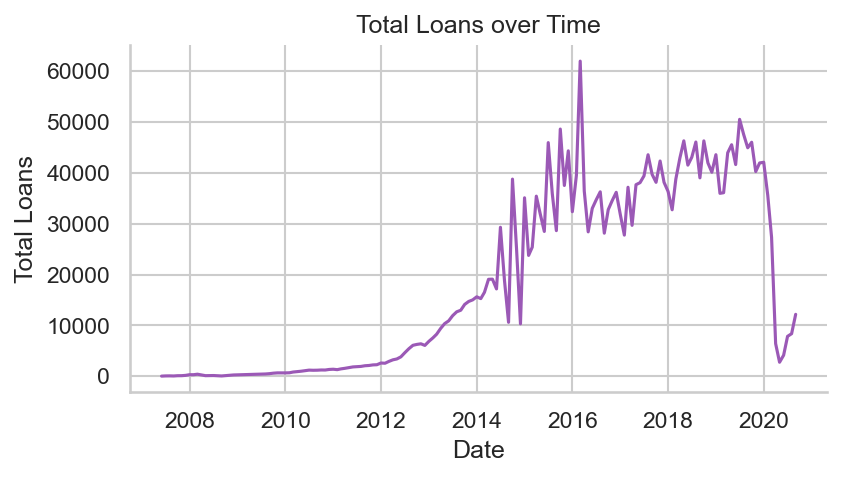

In [5]:
df_gp = df_raw.groupby('issue_d')['id'].count().reset_index()
df_gp

fig, ax = plt.subplots(1,  1, figsize=(6, 3))
ax = sns.lineplot(df_gp, x='issue_d', y='id')
plt.xlabel("Date")
plt.ylabel("Total Loans")
plt.title("Total Loans over Time")
sns.despine()
plt.show()

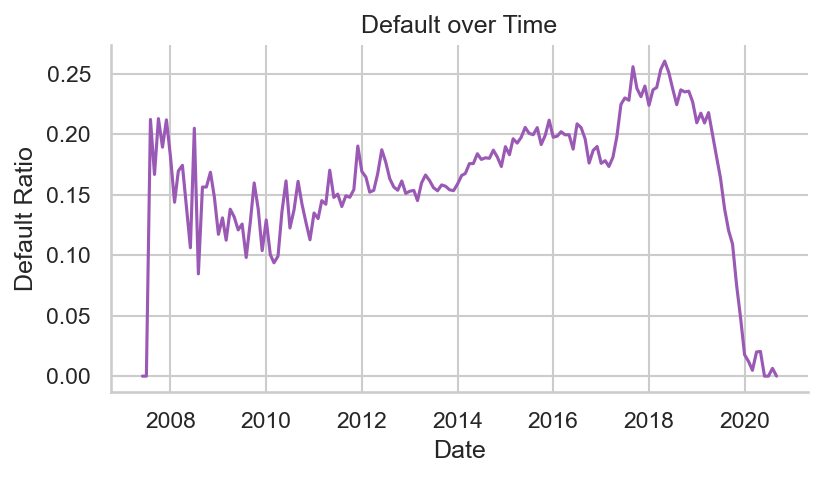

In [6]:
df_gp = df_raw.groupby('issue_d')['default'].mean().reset_index()
df_gp

fig, ax = plt.subplots(1,  1, figsize=(6, 3))
ax = sns.lineplot(df_gp, x='issue_d', y='default')
plt.xlabel("Date")
plt.ylabel("Default Ratio")
plt.title("Default over Time")
sns.despine()
plt.show()

In [7]:
df_train = df_raw[df_raw.issue_d < '2018-01-01']
df_test = df_raw[ (df_raw.issue_d >= '2018-01-01') & (df_raw.issue_d <= '2019-01-01')]

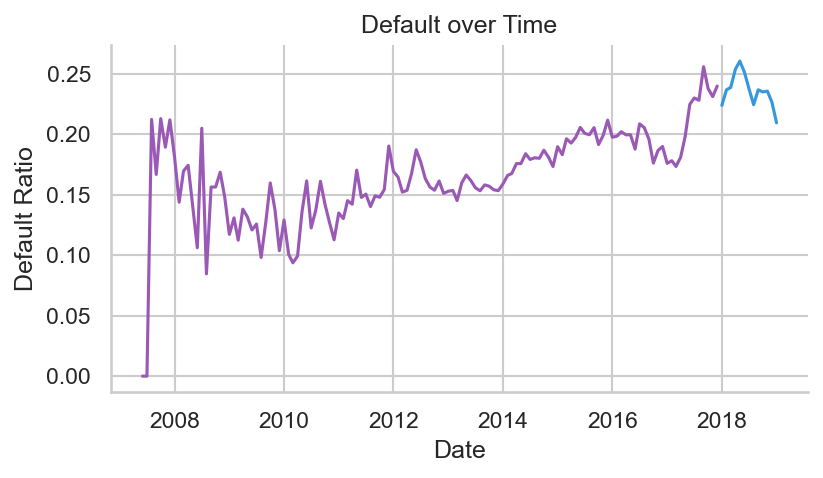

In [8]:
df_gp_train = df_train.groupby('issue_d')['default'].mean().reset_index()
df_gp_test = df_test.groupby('issue_d')['default'].mean().reset_index()

fig, ax = plt.subplots(1,  1, figsize=(6, 3))
sns.lineplot(df_gp_train, x='issue_d', y='default', ax=ax)
sns.lineplot(df_gp_test, x='issue_d', y='default', ax=ax)
plt.xlabel("Date")
plt.ylabel("Default Ratio")
plt.title("Default over Time")
sns.despine()
plt.show()

### Save Train and Test Dates to parquet

In [10]:
df_train.to_parquet('./case/data/processed/lending_club_case_train_dataset.parquet')

df_test.to_parquet('./case/data/processed/test_dataset_with_target.parquet')

df_test.drop(columns=['default']).to_parquet('./case/data/processed/lending_club_case_case_test_dataset.parquet')